In [5]:
source = [x.split(": ") for x in open("25.txt").read().splitlines()]

# Part 1

## Build the graph and visualize

(('grd', 'hvm'), 0.5049428515716787)
(('zfk', 'jmn'), 0.5010722963285343)
(('pmn', 'kdc'), 0.4682897428589192)


[None, None, None]

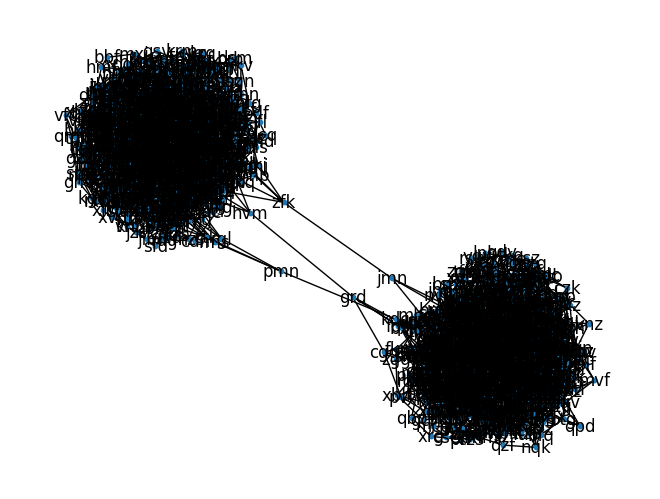

In [8]:
import networkx 

g = networkx.Graph()
for pair in source:
    origin = pair[0]
    targets = pair[1].split(" ")
    for target in targets:
        g.add_edge(origin, target)

positions = networkx.spring_layout(g)

positions_with_distance = []
for e in g.edges:
    a = positions[e[0]]
    b = positions[e[1]]
    distance = ((a[0] - b[0])**2 + (a[1] - b[1])**2)**0.5
    positions_with_distance.append((e,distance))

positions_with_distance.sort(key=lambda x: x[1], reverse=True)

networkx.draw(g,  pos=positions,  with_labels=True, node_size=10)



## Final Answer - Cutting the longest three edges

In [9]:
top3 = positions_with_distance[:3]
[print(x) for x in top3]

(('grd', 'hvm'), 0.5049428515716787)
(('zfk', 'jmn'), 0.5010722963285343)
(('pmn', 'kdc'), 0.4682897428589192)


[None, None, None]

part 1 score is 612945


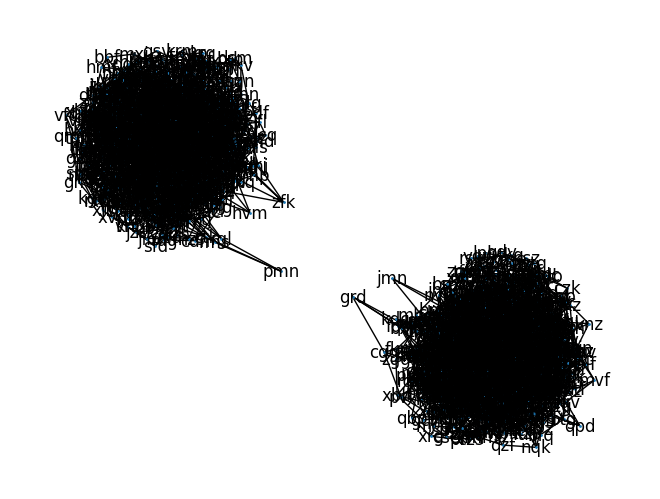

In [10]:
for e in top3: g.remove_edge(*e[0])
networkx.draw(g,  pos=positions,  with_labels=True, node_size=1)

score = 1
for n in top3[0][0]: score *= len(networkx.descendants(g, n)) +1
print("part 1 score is", score)